# Classificazione e Sentiment analysis su post provenienti da Reddit

## 1. Introduzione

Come visto precedentemente, Reddit è un social network caratterizzato da una struttura simile ai primissimi forum che popolavano internet fino a qualche anno fa. Riprendendo questo concetto si vuole addestrare un algoritmo di machine learning che opportunamente addestrato e ottimizzato riesca a classificare la categoria di un post. Nello specifico, andando ad allenare l'algoritmo su post che provengono da vari subreddit che trattano di linguaggi di programmazione e da altri il cui argomento di interesse è diverso dal mondo della programmazione e dell'informatica in generale in modo tale che alla fine esso riesca a classificare nuovi post, indicando se essi appartengono al mondo della programmazione o meno. 
A tal proposito andremo ad utilizzare l'algoritmo K-Nearest Neighbour e una sua ottimizzazione. I punti su cui lavorerà l'algoritmo saranno i vettori bag of words opportunamente estrapolati dai post di esempio. 
Dopo aver effettuato la classificazione, una seconda parte del progetto consisterà nel calcolare il sentiment dei post che parlano di programmazione. A tal proposito verrà utilizzato l'algoritmo VADER e in conclusione verrà calcolata la media delle valutazioni, in questo modo sarà possibile capire se generalmente gli utenti di Reddit utilizzano il social network per esporre difetti e lamentele dei vari linguaggi o per elogiarne le funzionalità e le potenzialità.  

Per accedere ai contenuti dei vari subreddit utilizzeremo le API di Reddit fornite dal wrapper Praw. Come citato nel tutorial, per avere accesso sarà necessario registrarsi a Reddit come programmatori e riscattare i token di identificazione.

In [1]:
import praw 
reddit = praw.Reddit(client_id = 'tvHkTZ-wanEENSM1GSdQ5w',
                     client_secret = 'kw-wzX7cNVvYYi8VBCjxjQp5C2Pn9Q',
                     username = 'tutorialSocialMedia',
                     password = 'password123',
                     user_agent = 'tutorialpython'
                    )

## 2. Estrazione dei dati e creazione del dataset

Dopo aver ottenuto l'oggetto reddit, potremo esplorare i vari subreddit del social network utilizzando i metodi del wrapper. Nelle prossime righe sarà effettuata l'estrapolazione dei post più recenti in modo da costruire un dataset di partenza su cui addestrare e testare gli algoritmi.
E' importante notare che il numero di post ritornati dal metodo "hot" non è fisso, per tale motivo è stabilito un limite superiore (posto a 5000) per evitare di appesantire e rallentare eccessivamente l'algoritmo.

I post sono nello specifico ottenuti dai subreddit: "Python", "C++", "Sushi", "Guitar", "Java", "nba","news" e "Ada".
Inoltre, conoscendo la provenienza dei post durante la fase di costruzione del dataset, è stato assegnato ad ognuno di essi, la classe di appartenenza "reale". Le possibili classi sono "programming" e "non programming", ad indicare la natura del post. 

In [2]:
subred = reddit.subreddit("Python")

In [3]:
import pandas as pd
df1 = []
for post in subred.hot(limit=5000):
    df1.append([post.title[:40], post.selftext, "programming"]
             )
df1 = pd.DataFrame(df1, columns=["title","text","class"])

In [4]:
df1.head()

,title,text,class
0,Sunday Daily Thread: What's everyone wor,Tell /r/python what you're working on this wee...,programming
1,Friday Daily Thread: Free chat Friday! D,Use this thread to talk about anything Python ...,programming
2,Notebooks suck: change my mind,Just switched roles from ml engineer at a comp...,programming
3,Entropy-based strategy to solving Wordle,Inspired by a [recent video of 3blue1brown](ht...,programming
4,"Master librarian, a simple tool to audit",,programming


Prendiamo adesso dei post da un altro subreddit che parla di programmazione, ad esempio il subreddit di C++:

In [5]:
subred = reddit.subreddit("cpp")  

In [6]:
df2 = []
for post in subred.hot(limit=5000):
    df2.append([post.title[:40], post.selftext, "programming"]
             )
df2 = pd.DataFrame(df2, columns=["title","text","class"])

In [7]:
df2.head()

,title,text,class
0,C++ Jobs - Q1 2022,Rules For Individuals\n---------------------\n...,programming
1,A C++ program to compute the coefficient,"Hi guys, I am particle physics PhD student pas...",programming
2,Embed the source code directly in your Q,,programming
3,Library for drone video + overlays,Hey guys.\n\nI'm building an app which receive...,programming
4,Qt Creator 7 - CMake update,,programming


Prendiamo adesso dei post da un subreddit che parla di sushi:

In [8]:
subred = reddit.subreddit("sushi")  

df3 = []
for post in subred.hot( limit=5000):
    df3.append([post.title[:40], post.selftext, "non programming"]
             )
df3 = pd.DataFrame(df3, columns=["title","text","class"])

In [9]:
df3.head()

,title,text,class
0,The Colours Of My Lunch,,non programming
1,First time making sushi!!,,non programming
2,Always craving sushi,,non programming
3,Dinner from my favorite local sushi plac,,non programming
4,Sushi somehow became an integral part of,,non programming


E dei post da un subreddit che parla di chitarre:

In [10]:
subred = reddit.subreddit("Guitar")  

df4 = []
for post in subred.hot( limit=5000):
    df4.append([post.title[:40], post.selftext, "non programming"]
             )
df4 = pd.DataFrame(df4, columns=["title","text","class"])

In [11]:
df4.head()

,title,text,class
0,[DISCUSSION] - February 2022 - NO STUPID,\n\nGood Day [r/Guitar](https://www.reddit.co...,non programming
1,[PLAY] R/GUITAR - Players Spotlight - Fe,Hello [r/Guitar](https://www.reddit.com/r/Guit...,non programming
2,[DISCUSSION] Chris Stapleton is a greatl,Reminds me of BB King. He doesn't play a lot o...,non programming
3,[DISCUSSION] I feel like an idiot for no,This morning I forced myself to anchor my righ...,non programming
4,[DISCUSSION] Crazy Train is beautiful cl,I started learning it last night and that main...,non programming


In [12]:
subred = reddit.subreddit("Java")  

df5 = []
for post in subred.hot( limit=5000):
    df5.append([post.title[:40], post.selftext, "programming"]
             )
df5 = pd.DataFrame(df5, columns=["title","text","class"])

In [13]:
df5.head()

,title,text,class
0,[PSA]/r/java is not for programming help,# /r/java is not for programming help or learn...,programming
1,Log4j MEGATHREAD,"Upon special request of /u/bluegoliath, we are...",programming
2,What can I do with Java 1.4?,"I need to do a project in Java 1.4.2. (Yes, an...",programming
3,Origin of misconception for equals and h,So i do some coding interviews at my company a...,programming
4,Alternative standard libraries,Seeing that Java brought a lot of cool tools t...,programming


In [14]:
subred = reddit.subreddit("nba")  

df6 = []
for post in subred.hot( limit=5000):
    df6.append([post.title[:40], post.selftext, "non programming"]
             )
df6 = pd.DataFrame(df6, columns=["title","text","class"])

In [15]:
df6.head()

,title,text,class
0,Daily Discussion Thread + Game Thread In,"# Game Threads Index (February 11, 2022):\n\n|...",non programming
1,Weekly Friday Self-Promotion and Fan Art,The **Self-Promotion Friday and Fan Art Thread...,non programming
2,Kyrie response to a fan on Twitter for s,Fan: I think if you combined [@KDTrey5](https...,non programming
3,"[Brooks] Sean Marks says ""Kyrie is frust",">Sean Marks says ""Kyrie is frustrated that he'...",non programming
4,[Bontemps] Sean Marks says Ben Simmons w,>Sean Marks says Ben Simmons was in Brooklyn t...,non programming


In [16]:
subred = reddit.subreddit("news")  

df7 = []
for post in subred.hot( limit=5000):
    df7.append([post.title[:40], post.selftext, "non programming"]
             )
df7 = pd.DataFrame(df7, columns=["title","text","class"])

In [17]:
df7.head()

,title,text,class
0,White father and son charged for chasing,,non programming
1,Jewish student reprimanded for revealing,,non programming
2,Judge restores protections for gray wolv,,non programming
3,Trucker protests: Ontario calls state of,,non programming
4,New intel suggests Russia is prepared to,,non programming


In [18]:
subred = reddit.subreddit("Ada")  

df8 = []
for post in subred.hot( limit=5000):
    df8.append([post.title[:40], post.selftext, "programming"]
             )
df8 = pd.DataFrame(df8, columns=["title","text","class"])

In [19]:
df8.head()

,title,text,class
0,Proving the Correctness of the GNAT Ligh,,programming
1,Have you successfully built the Gnat Doc,Has anyone successfully built AdaCore's gnat-...,programming
2,Is Ada GC bloated?,I know that Ada is also designed to serve embe...,programming
3,Struggling with packages and child packa,Struggling with a bit of a (beginner) problem:...,programming
4,Good design patterns for C APIs that ret,"I have an API that follows the usual ""call-fun...",programming


Dopo aver ottenuto i vari dataset contenenti i post dei subreddit presi in analisi, costruiamo un unico dataset che li contiene tutti. Durante questa fase inoltre, andiamo a rimuovere dal dataset tutti i record in cui non è presente del testo, infatti, in questi ultimi sono presenti immagini o link non utili ai fini della classificazione.

In [20]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8]
dataset = pd.concat(frames, ignore_index=True)
dataset = dataset.drop(dataset[dataset.text == ""].index)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 0 to 5270
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2610 non-null   object
 1   text    2610 non-null   object
 2   class   2610 non-null   object
dtypes: object(3)
memory usage: 81.6+ KB


Una volta ottenuto il dataframe che rappresenta i dati raccolti, utilizziamo la libreria **sklearn**  che ci fornirà tutti gli strumenti per portare a termine il task di classificazione, dalla creazione dei set su cui lavorare, l'algoritmo vero e proprio e al calcolo delle misure di valutazione.

Come appena citato il primo passo da effettuare è quello di dividere il dataset in due parti, per fare ciò utilizziamo il **metodo holdout**, ovvero assegneremo al training set l'**X%** delle osservazioni e al test set il restante **100-X%** delle osservazioni. Nel nostro caso avremo che **X = 25%**.

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(1234)

train_set, test_set = train_test_split(dataset, test_size=0.25)
train_set.info(); print('\n'); test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 4517 to 1508
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   1957 non-null   object
 1   text    1957 non-null   object
 2   class   1957 non-null   object
dtypes: object(3)
memory usage: 61.2+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 4345 to 2494
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   653 non-null    object
 1   text    653 non-null    object
 2   class   653 non-null    object
dtypes: object(3)
memory usage: 20.4+ KB


Osserviamo graficamente come sono disposte le osservazioni all'interno del nostro training set, in genere è buona norma che il training set sia **bilanciato** ovvero che le osservazioni appartenenti all'insieme siano ripartite in egual misura in base alla loro classe. 

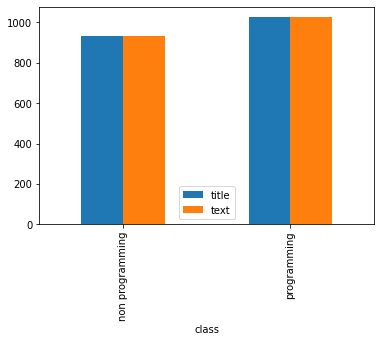

In [22]:
from matplotlib import pyplot as plt
train_set.groupby('class').count().plot.bar()
plt.show()

Possiamo adesso osservare parte dei due set per verificare che essi siano stati creati correttamente.

In [23]:
train_set.head()

,title,text,class
4517,Can't Find Syntax on This in Documentati,"type Pixel is record\n B, R, G...",programming
2579,[QUESTION] should I make my guitar bette,Little context.\n\nI live in Brazil and guitar...,non programming
527,Invalids (mostly branchless and delayed,[https://godbolt.org/z/TY5GdcxYf](https://godb...,programming
3821,Will Andre Drummond start in Brooklyn?,"Drummond looked good in Philadelphia, and sinc...",non programming
2741,[DISCUSSION] I am 18 years old and I jus,I am 18 years old in my senior year in high sc...,non programming


In [24]:
test_set.head()

,title,text,class
4345,[Job Posting] Lockheed Software Engineer,If anyone is interested: [https://www.lockheed...,programming
3428,"As of 2/11, 6 Teams control half of the","After the trade deadline, 6 teams control half...",non programming
1373,There's nothing better than a good Calif,I love sushi. But my favorite type of sushi is...,non programming
294,Raspberry Monitor - Flask/Bootstrap,Hello!\n\nJust wanted to share a small projec...,programming
4571,[ANN] UXStrings package available (UXS_2,A second POC implementation for UXStrings is p...,programming


## 3. Rappresentazione Bag of Word e creazione del vettore BOW

Dopo aver ottenuto i set su cui lavorare è necessario applicare ad essi una **funzione di trasformazione** che permetta di rappresentare in una forma comprensibile all'algoritmo.
A tal proposito utilizziamo la rappresentazione **Bag of Words** che dato un corpus di documenti (i nostri post) ritorna una rappresentazione che non considera l'ordine o il significato delle parole: dopo una fase di pre-processing in cui vengono applicati alcuni step della **NLP pipeline** ad ogni post verrà associato un ***vettore di lunghezza fissa*** che lo rappresenta in cui saranno evidenziati soltanto i termini appartenenti a quello specifico documento.
Per effettuare quest'operazione utilizzeremo ancora **sklearn** e in particolare l'oggetto **CountVectorizer**.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [26]:
x_train = count_vect.fit_transform(train_set['text'])
x_train

<1957x16675 sparse matrix of type '<class 'numpy.int64'>'
	with 134534 stored elements in Compressed Sparse Row format>

Come possiamo notare, dopo l'applicazione della funzione, il training set verrà rappresentato attraverso una **sparse matrix** e non più come un **dataframe**, questo per ottimizzare lo spazio occupato.

In [27]:
print(len(count_vect.vocabulary_))

16675


Un'altra importante informazione da visualizzare è la lunghezza del **vocabolario**, essa infatti rappresenta il numero di token estratti dal corpus. A partire da questa grandezza, ogni post verrà rappresentato tramite un vettore di lunghezza pari alla grandezza del vocabolario.

## 4. Classificazione kNN con k pari 1

Sappiamo che l'algoritmo **Knn** nasce come ottimizzazione dell'algoritmo **Neirest Neighbour**, infatti **k** è un **iperparametro** che rappresenta il numero di vicini nell'interno dell'osservazione da classificare che verranno considerati per stimare la classe del dato in input.

Come prima cosa applichiamo il kNN nella sua versione Naive per osservarne i risultati.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)  #impostiamo il numero di vicini pari a uno

Effettuiamo il training tramite la funzione **fit** fornita da sklearn:

In [29]:
knn.fit(x_train, train_set['class'])

KNeighborsClassifier(n_neighbors=1)

Dopo aver addestrato il classificatore è possibile effettuare una prova andandolo ad applicare su un'osservazione del test set che non ha mai visto e confrontandola con la classe di appartenenza reale. L'algoritmo è addestrato sulla rappresentazione bow dei post, sarà dunque prima necessario trasformare anche l'osservazione in input opportunamente:

In [30]:
test = test_set.iloc[1]['text']
trueclass = test_set.iloc[1]['class']
test

'After the trade deadline, 6 teams control half of the first round picks in the NBA Draft as of 2/11.\n\n&#x200B;\n\nHouston - 2\n\nPortland - 2\n\nIndiana - 2\n\nOklahoma City - 3\n\nSan Antonio - 3\n\nMemphis - 3\n\n&#x200B;\n\nIf Charlotte improves to pick greater than position #18, Atlanta will have 2 picks in the upcoming draft. This can obviously change over the coming months, but what implications, if any, will this have on the draft?'

In [31]:
feats=count_vect.transform([test])
feats

<1x16675 sparse matrix of type '<class 'numpy.int64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [32]:
print("classe predetta:", knn.predict(feats)[0])
print("classe reale:", trueclass)

classe predetta: non programming
classe reale: non programming


Calcoliamo adesso la predizione su tutti gli elementi del test set per poi poter ricavare le misure di valutazione del classificatore:

In [33]:
x_test = count_vect.transform(test_set['text'])
y_test_pred = knn.predict(x_test)

Come misura utilizzeremo l'**f1-score**, una misura ottenuta come **la media armonica di precision e recall** e ci fornisce una **visuale completa** della bontà del classificatore.

In [34]:
from sklearn.metrics import f1_score
#average=None is needed to obtain per-class scores. This will be just one class in our case.
#labels=['spam'] is needed to indicate that we are considering "spam" as the positive class
f1_scores = f1_score(test_set['class'], y_test_pred, average=None, labels=['programming'])[0]
print("F1-score K = 1:", f1_scores)

F1-score K = 1: 0.7261538461538461


Per avere contezza degli errori del nostro classificatore, essendo agevolati dalla situazione binaria in cui ci troviamo è possibile visualizzare la **confusion matrix** che fornisce la quantità di osservazioni classificate correttamente e la tipologia di errori commessi, in genere si preferiscono valori alti sulla diagonale principale e viceversa valori bassi sulla diagonale secondaria.

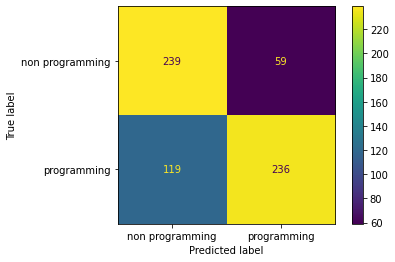

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 5. Stima del K migliore

Come detto prima, K è un iperparametro che va ottimizzato sulla base di un **validation set**, infatti al fine di ottenere il massimo rendimento dal nostro classificatore K va scelto con criterio. Per effettuare il **"tuning"** di k, usiamo ancora sklearn andando a visualizzare l'f1score utilizzando un k che va ***da 1 a 20***.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train,train_set['class'])
bestK= gs.best_params_['n_neighbors']

Cerchiamo adesso un riscontro grafico che ci permetta di osservare l'andamento dell'algoritmo al variare di K.

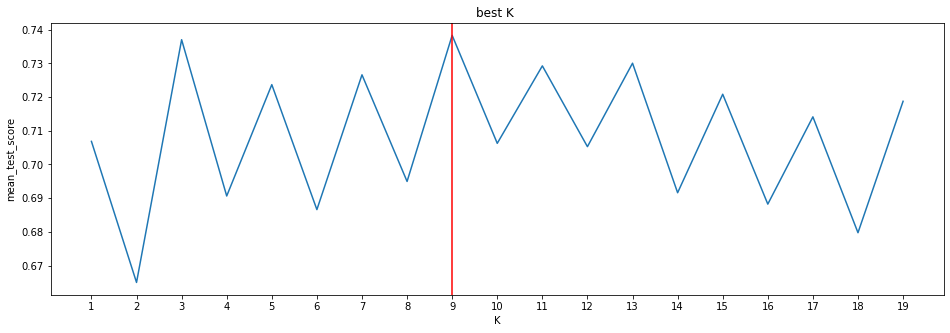

In [37]:
import matplotlib.pyplot as plt 
asseY = gs.cv_results_['mean_test_score']
asseX = list(range(1,20))
plt.figure(figsize = (16,5))
plt.plot(asseY)
plt.xticks(np.arange(len(asseY)), np.arange(1, len(asseY)+1)) #tick asse X

plt.title("best K ")
plt.xlabel("K")
plt.ylabel("mean_test_score")
max_value = max(asseY) 
max_index =np.where(asseY == max_value) #cerco dove il valore è max per stampare poi la linea rossa
plt.axvline(max_index, color = "r")
plt.show()

Possiamo adesso visualizzare l'output ottenuto dal tuning, ovvero il K migliore:

In [38]:
print("K migliore:", bestK)

K migliore: 9


Dopo aver stimato il parametro k ideale rieffettuiamo la classificazione e calcoliamo l'f1score e la matrice di confusione nuovamente:

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, train_set['class'])
x_test = count_vect.transform(test_set['text'])
y_test_pred2 = knn.predict(x_test)
f1_scores = f1_score(test_set['class'], y_test_pred2, average=None, labels=['programming'])[0]
print("F1-score K =",bestK,":", f1_scores)

F1-score K = 9 : 0.7401574803149606


Matrice di confusione con K ottimale:

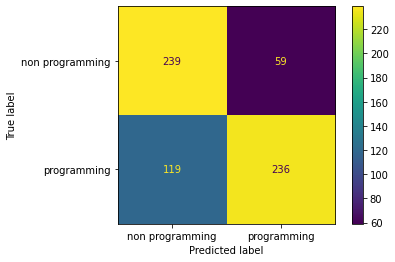

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_pred)

## 6. Ottimizzazione tramite rappresentazione TF-IDF

Proviamo adesso ad ottimizzare la rappresentazione dei dati che abbiamo a disposizione per cercare di migliorare le performance del classificatore.
L'obiettivo è quello di dare a parole meno frequenti (e quindi più significative) un peso maggiore, viceversa a parole più frequenti (meno significative) un peso minore. Questa tipologia di rappresentazione prende il nome di **TF-IDF** e permette di ottenere una classificazione più accurata meno sensibile agli **outliers**.
Per realizzare quanto detto prima, istanzieremo un nuovo classificatore che sarà però addestrato sui dati rappresentati tramite l'oggetto **TfidfTransformer** fornito da sklearn che calcola la rappresentazione **TF-IDF** dei post.

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False)

x_train_counts = count_vect.fit_transform(train_set['text'])
x_train_tf_idf = tf_transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(test_set['text'])
x_test_tf_idf = tf_transformer.fit_transform(x_test_counts)

Dopo aver ottenuto la rappresentazione tf-idf dei dati, ricerchiamo il k migliore per poi applicare l'algoritmo kNN:

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

knn = KNeighborsClassifier()

#definiamo che i k da testare vanno da 1 a 20
param_grid = {'n_neighbors': np.arange(1, 20)}

#specifichiamo che vogliamo utilizzare l'f1score come misura di confronto
f1 = make_scorer(f1_score , average='macro')
gs = GridSearchCV(knn, param_grid, cv=5,  scoring=f1)
gs.fit(x_train_tf_idf,train_set['class'])
bestK2= gs.best_params_['n_neighbors']


In [43]:
print("k miglior tf-idf:", bestK2)

k miglior tf-idf: 14


Effettuiamo le predizioni su tutto il test set:

In [44]:
classifier = KNeighborsClassifier(n_neighbors=bestK2)
classifier.fit(x_train_tf_idf, train_set['class'])

KNeighborsClassifier(n_neighbors=14)

calcoliamo l'**f1-score**:

In [45]:
y_test_preds = classifier.predict(x_test_tf_idf)
f1_scores=f1_score(test_set['class'],y_test_preds, average=None, labels=['programming'])[0]
print("f1-score tf-idf:",f1_scores)

f1-score tf-idf: 0.8895104895104895


Anche per questo caso è possibile ottenere la matrice di confusione:

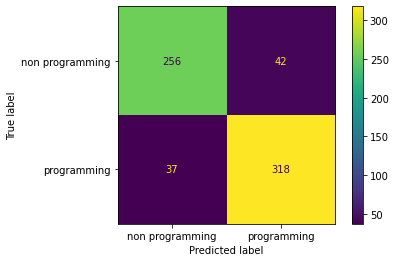

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_set['class'], y_test_preds)

## 7. Confronto tra i vari classificatori

Mettiamo adesso a confronto i tre risultati ottenuti visualizzando la **curva PR**, prima di fare ciò abbiamo bisogno ai fini del grafico di mappare i nomi delle classi, avremo dunque:
* non programming = 0;
* programming = 0;

Di seguito il processo di mapping e il plot della curva PR:

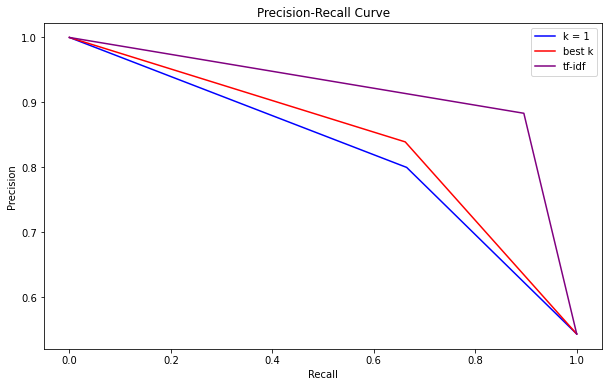

In [47]:
#map delle etichette reali
test_zero_one = test_set.copy()
test_zero_one = test_zero_one.replace(to_replace=['non programming', 'programming'], value=[0, 1])

#map delle varie predizioni
y_preds_zero_one_tf_idf = y_test_preds.copy()
for i in range(y_preds_zero_one_tf_idf.size):
    if(y_preds_zero_one_tf_idf[i] == 'programming'):
        y_preds_zero_one_tf_idf[i] = 1
    else:
        y_preds_zero_one_tf_idf[i] = 0

        
y_preds_zero_one_bestk = y_test_pred2.copy()
for i in range(y_preds_zero_one_bestk.size):
    if(y_preds_zero_one_bestk[i] == 'programming'):
        y_preds_zero_one_bestk[i] = 1
    else:
        y_preds_zero_one_bestk[i] = 0
        
y_preds_zero_one_k1 = y_test_pred.copy()
for i in range(y_preds_zero_one_k1.size):
    if(y_preds_zero_one_k1[i] == 'programming'):
        y_preds_zero_one_k1[i] = 1
    else:
        y_preds_zero_one_k1[i] = 0  
        
#generazione valori x,y della curva PR e plot
from sklearn.metrics import precision_recall_curve
from matplotlib.pyplot import figure
figure(figsize=(10, 6))

precision_k1, recall_k1, thresholds_k1 = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_k1)
plt.plot(recall_k1, precision_k1, color='blue', label='k = 1')

precision_bestk, recall_bestk, thresholds_bestk = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_bestk)
plt.plot(recall_bestk, precision_bestk, color='red', label='best k')

precision_tfidf, recall_tfidf, thresholds_tfidf = precision_recall_curve(test_zero_one['class'], y_preds_zero_one_tf_idf)
plt.plot(recall_tfidf, precision_tfidf, color='purple', label='tf-idf')

plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.legend()
plt.show()

Possiamo adesso calcolare l'**area under the curver**, ovvero una metrica che calcolando l'area sottesa alla curva PR permette di stimare la bontà del classificatore. L'AUC è un valore compreso tra 0 e 1, idealmente vorremmo che il nostro classificatore abbia **AUC = 1**.

In [48]:
from sklearn.metrics import roc_auc_score
auc_k1 = roc_auc_score(test_zero_one['class'],y_preds_zero_one_k1)
auc_bestk = roc_auc_score(test_zero_one['class'],y_preds_zero_one_bestk)
auc_tfidf = roc_auc_score(test_zero_one['class'],y_preds_zero_one_tf_idf)

print('AUC k = 1: %.3f' % auc_k1)
print('AUC best k: %.3f' % auc_bestk)
print('AUC tf-idf: %.3f' % auc_tfidf)

AUC k = 1: 0.733
AUC best k: 0.755
AUC tf-idf: 0.877


## 8. Sentiment analysis sui post che parlano di programmazione

Dopo aver classificato i post provenienti dai vari subreddit, proviamo ad analizzarne il **sentiment** ovvero, lo stato d'animo dell'autore quando ha scritto quel determinato post. Alla fine stimeremo una media dei sentiment per vedere se in generale, tramite Reddit gli utenti esprimono le loro problematiche o evidenziano i punti di forza di un linguaggio e lo consigliano.
Per portare a termine questo compito utilizzeremo l'algoritmo **VADER**, ovvero un algoritmo slegato dal dominio delle osservazioni che diamo in input e che assegna ad ogni parola un punteggio, basato su statistiche ottenute dalla media dei punteggi espressi da dei volontari.
Per effettuare l'analisi utilizzando VADER faremo uso della libreria **nltk**.

Come prima cosa dovremo caricare il package di lexicon fornito da vader:

In [49]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/rosario/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

A questo punto potremo creare l'oggetto **sid** che ci permetterà di effettuare il **calcolo del sentiment**.

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Prima di procedere dobbiamo creare  un dataframe che contiene solamente i post che sono stati classificati come "programming" nel test set avendo a disposizione il test set e gli indici ottenuti dal classificatore. 

Come prima cosa conserviamo solo gli indici dei post classificati come "non programming" in modo da rimuoverli successivamente dal test set su cui applicare VADER:

In [51]:
output = [idx for idx, element in enumerate(y_test_preds) if len(element) == 'non programming']

A questo punto, rimuoviamo da dfProg tutti i record la cui predizione è diversa da 'programming':

In [52]:
dfProg = test_set.copy()
dfProg = dfProg.drop(labels=output, axis=0)
dfProg

,title,text,class
4345,[Job Posting] Lockheed Software Engineer,If anyone is interested: [https://www.lockheed...,programming
3428,"As of 2/11, 6 Teams control half of the","After the trade deadline, 6 teams control half...",non programming
1373,There's nothing better than a good Calif,I love sushi. But my favorite type of sushi is...,non programming
294,Raspberry Monitor - Flask/Bootstrap,Hello!\n\nJust wanted to share a small projec...,programming
4571,[ANN] UXStrings package available (UXS_2,A second POC implementation for UXStrings is p...,programming
...,...,...,...
2561,[QUESTION] Humbuckers or P90s?,If you could only have one guitar and wanted i...,non programming
4992,GNAT fails to build from GCC trunk,Back in November I added support for Ada using...,programming
1921,Nervous about trying a new sushi?,The only sushi I have eaten are California rol...,non programming
3213,JVM optimisation,"Hello everyone, \nI work with java development...",programming


Ovviamente saranno presenti anche record 'non programming' in corrispondenza degli errori effettuati dal classificatore.

Sostituiamo la colonna class del dataframe ormai non più necessaria con una colonna 'score' ottenuta dallo lexicon score di vader.
Calcoliamo per ogni riga del dataframe già filtrato il **compound** del testo associato:

In [53]:
rows, cols = dfProg.shape
score = []
for i in range(rows):
    score.append(sid.polarity_scores(dfProg.iloc[i]['text'])['compound'])

In [54]:
dfProg = dfProg.assign(score = score)
dfProg

,title,text,class,score
4345,[Job Posting] Lockheed Software Engineer,If anyone is interested: [https://www.lockheed...,programming,0.4019
3428,"As of 2/11, 6 Teams control half of the","After the trade deadline, 6 teams control half...",non programming,0.3919
1373,There's nothing better than a good Calif,I love sushi. But my favorite type of sushi is...,non programming,0.9625
294,Raspberry Monitor - Flask/Bootstrap,Hello!\n\nJust wanted to share a small projec...,programming,0.8743
4571,[ANN] UXStrings package available (UXS_2,A second POC implementation for UXStrings is p...,programming,0.9118
...,...,...,...,...
2561,[QUESTION] Humbuckers or P90s?,If you could only have one guitar and wanted i...,non programming,0.7963
4992,GNAT fails to build from GCC trunk,Back in November I added support for Ada using...,programming,-0.9542
1921,Nervous about trying a new sushi?,The only sushi I have eaten are California rol...,non programming,0.1027
3213,JVM optimisation,"Hello everyone, \nI work with java development...",programming,0.9761


Il compound è un valore compreso tra -1 e 1, dove 1 indica che il sentiment della frase è totalmente positivo mentre -1 che il sentiment è totalmente negativo.

Calcoliamo adesso la media dello score delle singole valutazioni per vedere in generale il sentiment rispetto a quello che sono i post nei subreddit di programmazione:

In [55]:
import statistics
statistics.mean(score)

0.4104528330781011

## 9. Conclusioni

Concludendo, quella ottenuta è una pipeline che dato un insieme di post provenienti da Reddit (comunque generalizzabile a qualsiasi fonte) permette di estrarre solo quelli che trattano di programmazione e di analizzarne il sentiment in modo da trarre delle conclusioni e stimare il pensiero degli utenti che fanno uso dei vari linguaggi. Sono state marcate le differenze tra le varie ottimizzazioni che è possibile applicare ad un algoritmo semplice come il kNN che si ricorda essere un algoritmo **lazy**, ovvero un algoritmo la cui fase di training si limita a memorizzare il training set e ad approssimare una pseudofunzione di classificazione solo nel momento in cui viene richiesto di classificare una nuova osservazione. 
Generalizzando, questa catena di processi è utilizzabile ogni qual volta data una quantità di dati generici, si vuole isolare una sola categoria di essi per capire se di quest'ultima si sta parlando positivamente o meno. Il processo è applicabile in molti contesti e quello dei post di un social network ne è l'esempio più generale.